**Carbon Intensity -- Average + Marginal Data**

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

sns.set_theme(style='ticks', context='paper')

In [3]:
# Constants
avg_cols = ['date','hour','day','month','weekday','ci']
marg_cols = ['date','hour','ci']
region_prefixes = ['gb', 'de', 'ca', 'tx', 'za', 'tyo', 'nsw']
regions = ['Great Britain', 'Germany', 'California', 'Texas', 'South Africa', 'Tokyo', 'New South Wales']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
short_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_num = range(1,13)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
short_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon']
gb_shift = -1
de_shift = -2
ca_shift = 7
tx_shift = 5
zaf_shift = -2
tyo_shift = -9
nsw_shift = -9
shifts = [gb_shift, de_shift, ca_shift, tx_shift, zaf_shift, tyo_shift, nsw_shift]  # according to BST now (UTC+1)
season_names = ['Winter', 'Spring', 'Summer', 'Autumn']
short_seasons = ['spr', 'sum', 'aut', 'win']

In [4]:
# Functions
def load_df(region, year, ci_type):
    if ci_type == 'avg':
        df = pd.read_csv(f'../data/intensity/avg-{region}-{year}.csv', names=avg_cols, skiprows=1)
    else:
        df = pd.read_csv(f'../data/intensity/marg-{region}-{year}.csv', names=marg_cols, skiprows=1)
        df[['year', 'month', 'day']] = df['date'].str.split('-', n=2, expand=True)

    df_ci = df[['date', 'hour', 'ci']]
    df_ci = df_ci.rename(columns={'ci': region + '_ci'})

    return (df, df_ci)

def shift_by_timezone(data, shift):
    shifted = pd.concat([data[shift:], data[:shift]])
    shifted['hour'] = data['hour']
    return shifted

In [5]:
# Average CI Data -- from Electricity Maps

# 2024
(gb, gb_ci) = load_df('gb', '2024', 'avg')  # Great Britain
(de, de_ci) = load_df('de', '2024', 'avg')  # Germany
(ca, ca_ci) = load_df('ca', '2024', 'avg')  # California
(tx, tx_ci) = load_df('tx', '2024', 'avg')  # Texas
(zaf, zaf_ci) = load_df('zaf', '2024', 'avg')  # South Africa
(tyo, tyo_ci) = load_df('tyo', '2024', 'avg')  # Tokyo
(nsw, nsw_ci) = load_df('nsw', '2024', 'avg')  # New South Wales

all_2024_avg_data = pd.concat([gb_ci, de_ci, ca_ci, tx_ci, zaf_ci, tyo_ci, nsw_ci], axis=1)
print(all_2024_avg_data.describe())

# 2023 
(gb_2023, gb_ci_2023) = load_df('gb', '2023', 'avg')  # Great Britain
(de_2023, de_ci_2023) = load_df('de', '2023', 'avg')  # Germany
(ca_2023, ca_ci_2023) = load_df('ca', '2023', 'avg')  # California
(tx_2023, tx_ci_2023) = load_df('tx', '2023', 'avg')  # Texas
(zaf_2023, zaf_ci_2023) = load_df('zaf', '2023', 'avg')  # South Africa
(tyo_2023, tyo_ci_2023) = load_df('tyo', '2023', 'avg')  # Tokyo
(nsw_2023, nsw_ci_2023) = load_df('nsw', '2023', 'avg')  # New South Wales

all_2023_avg_data = pd.concat([gb_ci_2023, de_ci_2023, ca_ci_2023, tx_ci_2023, zaf_ci_2023, tyo_ci_2023, nsw_ci_2023], axis=1)


             gb_ci        de_ci        ca_ci        tx_ci       zaf_ci  \
count  8784.000000  8784.000000  8784.000000  8784.000000  8784.000000   
mean    105.687816   275.124187   168.426444   301.854707   656.719498   
std      54.942573   111.280334    75.313022    79.434659    31.210846   
min       7.700000    66.850000    20.190000    99.530000   547.830000   
25%      60.955000   180.865000   103.237500   243.527500   634.830000   
50%      94.525000   273.190000   177.495000   300.610000   658.475000   
75%     143.377500   359.952500   235.060000   360.155000   680.572500   
max     277.980000   563.230000   325.640000   486.480000   740.720000   

            tyo_ci       nsw_ci  
count  8784.000000  8784.000000  
mean    452.669816   500.155390  
std      68.287553   147.710867  
min     140.510000   129.010000  
25%     414.535000   380.847500  
50%     493.680000   547.050000  
75%     498.850000   618.405000  
max     508.340000   748.000000  


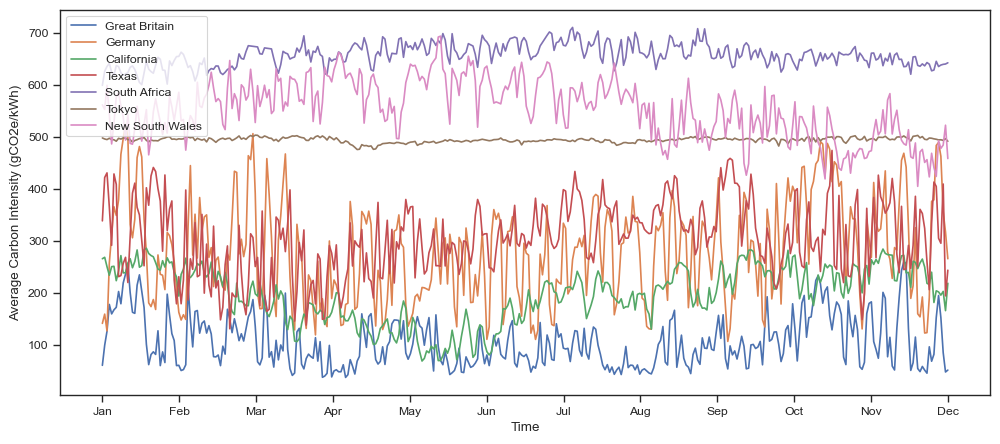

In [6]:
# Plot Smoothed Regional Comparison
plt.figure(figsize=(12,5))
gb_ci.groupby(['date'])['gb_ci'].median().plot(label='Great Britain')
de_ci.groupby(['date'])['de_ci'].median().plot(label='Germany')
ca_ci.groupby(['date'])['ca_ci'].median().plot(label='California')
tx_ci.groupby(['date'])['tx_ci'].median().plot(label='Texas')
zaf_ci.groupby(['date'])['zaf_ci'].median().plot(label='South Africa')
tyo_ci.groupby(['date'])['tyo_ci'].median().plot(label='Tokyo')
nsw_ci.groupby(['date'])['nsw_ci'].median().plot(label='New South Wales')
plt.legend(loc='upper left')
plt.xticks(np.linspace(0,365,12), short_months)
plt.xlabel('Time')
plt.ylabel('Average Carbon Intensity (gCO2e/kWh)')
plt.show()

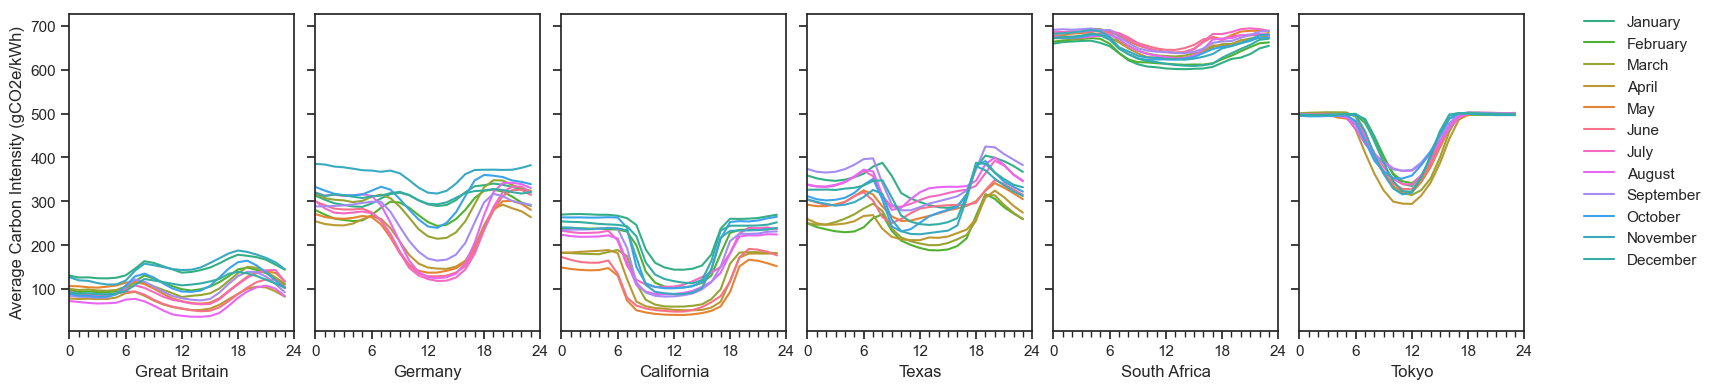

In [7]:
# Monthly Analysis
sns.set_theme(style='ticks')

f, axs = plt.subplots(ncols=6, nrows=1, sharey=True, sharex=True, figsize=(15,3.5))
f.tight_layout(pad=0)
palette = sns.palettes._ColorPalette(np.roll(np.flip(sns.color_palette("husl", 12), axis=0), 6, axis=0))

for ax, region, label, shift in zip(axs, [gb, de, ca, tx, zaf, tyo, nsw], regions, shifts):
    data_by_month = region.groupby('month', as_index=False, sort=False)

    for month_num, colour, month_name in zip(months_num, palette, months):
        month_data = data_by_month.get_group(month_num)
        avg_day_ci = month_data.groupby('hour', as_index=False, sort=False)['ci'].mean()
        shifted = shift_by_timezone(avg_day_ci, shift)
        ax.plot(avg_day_ci['hour'], shifted['ci'].values, color=colour, label=month_name)

    ax.set_xlabel(label)
    ax.set_xlim(0, 24)
    ticks = range(0, 25, 6)
    minor_ticks = range(0, 25)
    ax.set_xticks(ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_xticklabels([f'{int(tick)}' for tick in ticks])

handles, labels = ax.get_legend_handles_labels()
f.legend(handles, months, loc='upper right', bbox_to_anchor=(1.12, 1.02), frameon=False)
axs[0].set(ylabel='Average Carbon Intensity (gCO2e/kWh)')

plt.savefig('../image/avg-ci-hist-by-month-2024.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Plot Weekly Analysis with Windows of Low-Carbon Intensity Highlighted (!)
def plot_weekly_analysis_compare_all(window_width=8):
    # Weekly Analysis
    f, axs = plt.subplots(ncols=1, nrows=6, sharex=True, figsize=(6,6))
    f.tight_layout(pad=0)
    f.text(-0.075, 0.5, 'Average Carbon Intensity (gCO2e/kWh)', ha='center', va='center', rotation='vertical')

    # Plot Average Carbon Intensity w/ Error and Low-Carbon Windows for Each region
    for ax, region, label, shift in zip(axs, [gb, de, ca, tx, zaf, tyo, nsw], regions, shifts):
        data_by_weekday = region.groupby('weekday', as_index=False, sort=False)
        full_week_ci = []
        full_week_times = []
        full_week_err_low = []
        full_week_err_high = []
        full_week_medians = []

        for day, num in zip(days, range(0, 7)):
            day_data = data_by_weekday.get_group(day)
            avg_day_ci = day_data.groupby('hour', as_index=False, sort=False)['ci'].mean()
            avg_day_sem = day_data.groupby('hour', as_index=False, sort=False)['ci'].sem() 
            confidence_int = 1.96 * avg_day_sem['ci']
            ci_low = avg_day_ci['ci'] - confidence_int
            ci_high = avg_day_ci['ci'] + confidence_int
            time = avg_day_ci.index + (24 * num)

            full_week_ci = np.concatenate((full_week_ci, avg_day_ci['ci'].values))
            full_week_times = np.concatenate((full_week_times, time))
            full_week_err_low = np.concatenate((full_week_err_low, ci_low))
            full_week_err_high = np.concatenate((full_week_err_high, ci_high))

            full_week_medians.append(avg_day_ci['ci'].median())

        shifted_full_week = np.roll(full_week_ci, -shift)
        shifted_full_week_err_low = np.roll(full_week_err_low, -shift)
        shifted_full_week_err_high = np.roll(full_week_err_high, -shift)
        sns.lineplot(y=shifted_full_week, x=full_week_times, ax=ax)
        ax.fill_between(full_week_times, shifted_full_week_err_low, shifted_full_week_err_high, alpha=0.15)

        ax.set_ylabel(label)
        ax.set_xlim(0, 24 * 7)
        ticks = range(0, 24 * 7 + 1, 24)
        minor_ticks = range(0, 24 * 7 + 1, 6)
        ax.set_xticks(ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_xticklabels(short_days)

        # Plot Low Carbon Windows
        weekly_avg_median = sum(full_week_medians) / len(full_week_medians)
        peaks, props = find_peaks(-shifted_full_week, prominence=1, width=window_width, height=-weekly_avg_median)

        for left, right in zip(props['left_ips'], props['right_ips']):
            ax.axvspan(left, right, color='green', alpha=0.3)

    ax.set(xlabel="Weekday")
    f.align_ylabels()

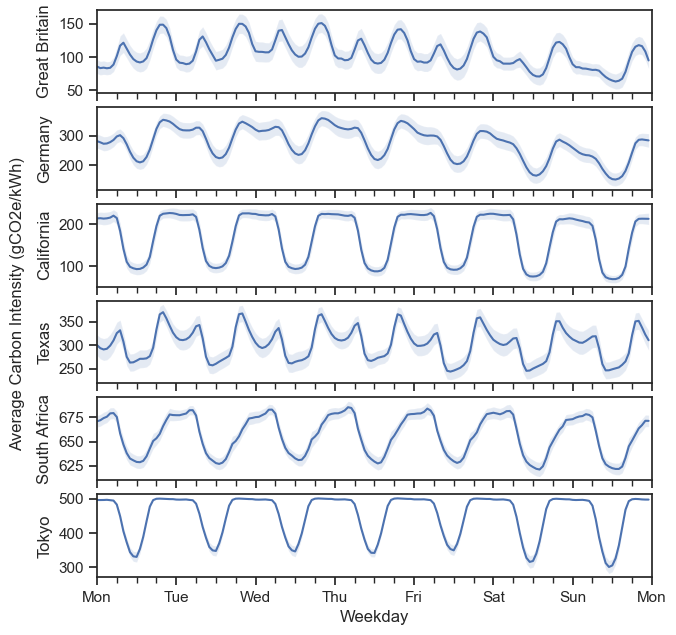

In [9]:
# Weekly Analysis
plot_weekly_analysis_compare_all(window_width=24)
plt.savefig('../image/avg-weekly-ci-pattern-2024.pdf', dpi=300, bbox_inches='tight')
plt.show()

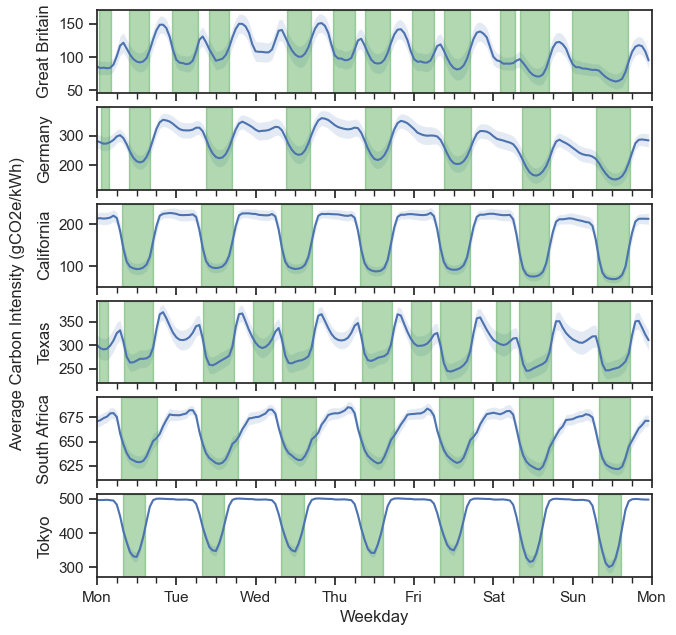

In [10]:
plot_weekly_analysis_compare_all(window_width=2)
plt.savefig('../image/avg-weekly-ci-windows-2024.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Marginal CI Data -- from WattTime

# 2024
(marg_gb, marg_gb_ci) = load_df('gb', '2024', 'marg')  # Great Britain
(marg_de, marg_de_ci) = load_df('de', '2024', 'marg')  # Germany
(marg_ca, marg_ca_ci) = load_df('ca', '2024', 'marg')  # California
(marg_tx, marg_tx_ci) = load_df('tx', '2024', 'marg')  # Texas
(marg_zaf, marg_zaf_ci) = load_df('zaf', '2024', 'marg')  # South Africa
(marg_tyo, marg_tyo_ci) = load_df('tyo', '2024', 'marg')  # Tokyo
(marg_nsw, marg_nsw_ci) = load_df('nsw', '2024', 'marg')  # New South Wales

all_2024_marg_data = pd.concat([marg_gb_ci, marg_de_ci, marg_ca_ci, marg_tx_ci, marg_zaf_ci, marg_tyo_ci, marg_nsw_ci], axis=1)
all_2024_marg_data.describe()

# 2023 (_2023)
(marg_gb_2023, marg_gb_ci_2023) = load_df('gb', '2023', 'marg')  # Great Britain
(marg_de_2023, marg_de_ci_2023) = load_df('de', '2023', 'marg')  # Germany
(marg_ca_2023, marg_ca_ci_2023) = load_df('ca', '2023', 'marg')  # California
(marg_tx_2023, marg_tx_ci_2023) = load_df('tx', '2023', 'marg')  # Texas
(marg_zaf_2023, marg_zaf_ci_2023) = load_df('zaf', '2023', 'marg')  # South Africa
(marg_tyo_2023, marg_tyo_ci_2023) = load_df('tyo', '2023', 'marg')  # Tokyo
(marg_nsw_2023, marg_nsw_ci_2023) = load_df('nsw', '2023', 'marg')  # New South Wales

all_2023_marg_data = pd.concat([marg_gb_ci_2023, marg_de_ci_2023, marg_ca_ci_2023, marg_tx_ci_2023, marg_zaf_ci_2023, marg_tyo_ci_2023, marg_nsw_ci_2023], axis=1)

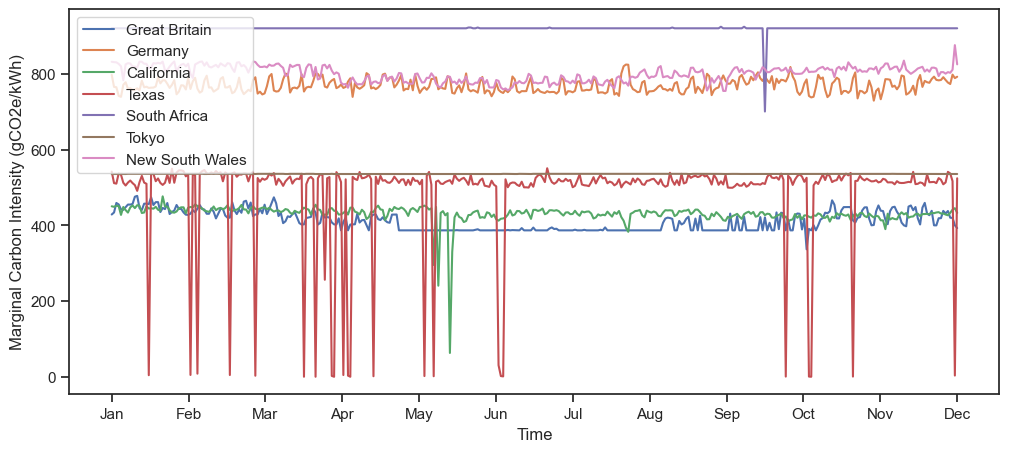

In [12]:
# Plot Smoothed Regional Comparison
plt.figure(figsize=(12,5))
marg_gb_ci.groupby(['date'])['gb_ci'].median().plot(label='Great Britain')
marg_de_ci.groupby(['date'])['de_ci'].median().plot(label='Germany')
marg_ca_ci.groupby(['date'])['ca_ci'].median().plot(label='California')
marg_tx_ci.groupby(['date'])['tx_ci'].median().plot(label='Texas')
marg_zaf_ci.groupby(['date'])['zaf_ci'].median().plot(label='South Africa')
marg_tyo_ci.groupby(['date'])['tyo_ci'].median().plot(label='Tokyo')
marg_nsw_ci.groupby(['date'])['nsw_ci'].median().plot(label='New South Wales')
plt.legend(loc='upper left')
plt.xticks(np.linspace(0,365,12), short_months)
plt.xlabel('Time')
plt.ylabel('Marginal Carbon Intensity (gCO2e/kWh)')
plt.show()

In [13]:
# Group Data by Days
avg_gb_by_date = gb.groupby(['date'])
avg_de_by_date = de.groupby(['date'])
avg_ca_by_date = ca.groupby(['date'])
avg_tx_by_date = tx.groupby(['date'])
avg_zaf_by_date = zaf.groupby(['date'])
avg_tyo_by_date = tyo.groupby(['date'])
avg_nsw_by_date = nsw.groupby(['date'])

marg_gb_by_date = marg_gb.groupby(['date'])
marg_de_by_date = marg_de.groupby(['date'])
marg_ca_by_date = marg_ca.groupby(['date'])
marg_tx_by_date = marg_tx.groupby(['date'])
marg_zaf_by_date = marg_zaf.groupby(['date'])
marg_tyo_by_date = marg_tyo.groupby(['date'])
marg_nsw_by_date = marg_nsw.groupby(['date'])

In [14]:
# Function to Plot Day comparing all regions
def compare_regions_for_day(signal, selected_date):
    plt.figure(figsize=(8,4))
    # np.roll(marg_region_by_day.get_group(selected_day)['ci'], -(shift * 12))
    if signal == 'avg':
        plt.plot(range(0, 24), np.roll(avg_gb_by_date.get_group(selected_date)['ci'], -gb_shift), label='Great Britain')
        plt.plot(range(0, 24), np.roll(avg_de_by_date.get_group(selected_date)['ci'], -de_shift),label='Germany')
        plt.plot(range(0, 24), np.roll(avg_ca_by_date.get_group(selected_date)['ci'], -ca_shift),label='California')
        plt.plot(range(0, 24), np.roll(avg_tx_by_date.get_group(selected_date)['ci'], -tx_shift),label='Texas')
        plt.plot(range(0, 24), np.roll(avg_zaf_by_date.get_group(selected_date)['ci'], -zaf_shift),label='South Africa')
        plt.plot(range(0, 24), np.roll(avg_tyo_by_date.get_group(selected_date)['ci'], -tyo_shift),label='Tokyo')
        plt.plot(range(0, 24), np.roll(avg_nsw_by_date.get_group(selected_date)['ci'], -nsw_shift),label='New South Wales')

        plt.legend(bbox_to_anchor=(1.0, 1.0), frameon=False)
        plt.xticks(ticks=range(0,25), minor=True)
        plt.xticks(ticks=range(0,25,6), labels=range(0,25,6))
        plt.xlabel(selected_date)
        plt.ylabel('Average Carbon Intensity (gCO2e/kWh)')
    else:
        plt.plot(range(0, 288), np.roll(marg_gb_by_date.get_group(selected_date)['ci'], -(gb_shift * 12)), label='Great Britain')
        plt.plot(range(0, 288), np.roll(marg_de_by_date.get_group(selected_date)['ci'], -(ca_shift * 12)),label='Germany')
        plt.plot(range(0, 288), np.roll(marg_ca_by_date.get_group(selected_date)['ci'], -(ca_shift * 12)),label='California')
        plt.plot(range(0, 288), np.roll(marg_tx_by_date.get_group(selected_date)['ci'], -(tx_shift * 12)),label='Texas')
        plt.plot(range(0, 288), np.roll(marg_zaf_by_date.get_group(selected_date)['ci'], -(zaf_shift * 12)),label='South Africa')
        plt.plot(range(0, 288), np.roll(marg_tyo_by_date.get_group(selected_date)['ci'], -(tyo_shift * 12)),label='Tokyo')
        plt.plot(range(0, 288), np.roll(marg_nsw_by_date.get_group(selected_date)['ci'], -(nsw_shift * 12)),label='New South Wales')

        plt.legend(bbox_to_anchor=(1.0, 1.0), frameon=False)
        plt.xticks(ticks=range(0,288,12), minor=True)
        plt.xticks(ticks=range(0,289,72), labels=range(0,25,6))
        plt.xlabel(selected_date)
        plt.ylabel('Marginal Carbon Intensity (gCO2e/kWh)')

    plt.show()

/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/3496853990.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 288), np.roll(marg_gb_by_date.get_group(selected_date)['ci'], -(gb_shift * 12)), label='Great Britain')
/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/3496853990.py:21: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 288), np.roll(marg_de_by_date.get_group(selected_date)['ci'], -(ca_shift * 12)),label='Germany')
/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/3496853990.py:22: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fut

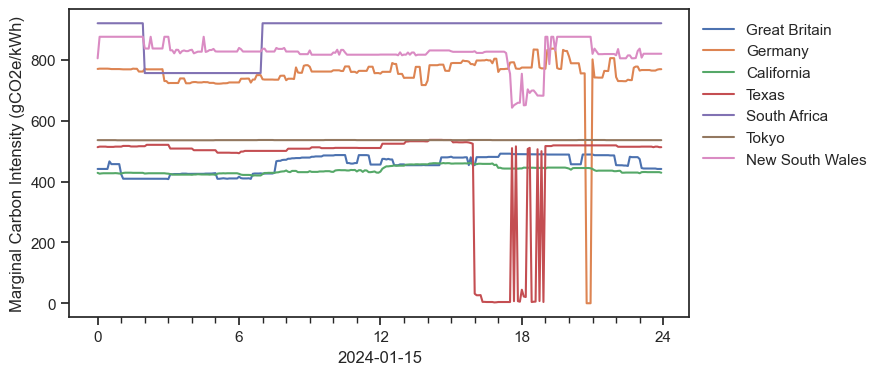

In [15]:
# Plot Shorter Intervals of Marginal Data to highlight brief fluctuation
compare_regions_for_day('marg', '2024-01-15')

/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/3496853990.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 24), np.roll(avg_gb_by_date.get_group(selected_date)['ci'], -gb_shift), label='Great Britain')
/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/3496853990.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 24), np.roll(avg_de_by_date.get_group(selected_date)['ci'], -de_shift),label='Germany')
/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/3496853990.py:8: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas

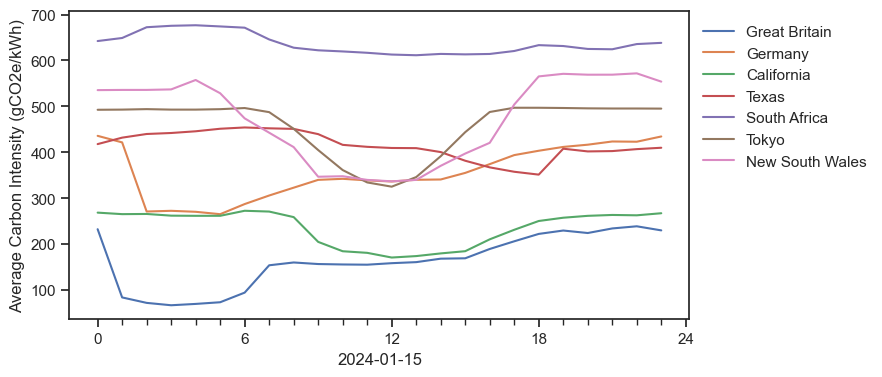

In [16]:
# Plot Shorter Intervals of Average Data to highlight fluctuation / compare with marginal (!)
compare_regions_for_day('avg', '2024-01-15')

In [17]:
# Function to compare the average and marginal signals on a single day for a region
def compare_region_signals_for_day(avg_region_by_day, marg_region_by_day, selected_day, region_name, shift):
    plt.figure(figsize=(8,4))
    plt.plot(range(0, 288), np.roll(marg_region_by_day.get_group(selected_day)['ci'], -(shift * 12)), label='Marginal')
    plt.plot(range(0, 288, 12), np.roll(avg_region_by_day.get_group(selected_day)['ci'], -shift), label='Average')
    plt.legend(bbox_to_anchor=(1.0, 1.0), frameon=False)
    plt.xticks(ticks=range(0,288,12), minor=True)
    plt.xticks(ticks=range(0,289,72), labels=range(0,25,6))
    plt.xlabel(f'{region_name} on {selected_day}')
    plt.ylabel('Carbon Intensity (gCO2e/kWh)')
    plt.show()

/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/2713598477.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 288), np.roll(marg_region_by_day.get_group(selected_day)['ci'], -(shift * 12)), label='Marginal')
/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/2713598477.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 288, 12), np.roll(avg_region_by_day.get_group(selected_day)['ci'], -shift), label='Average')


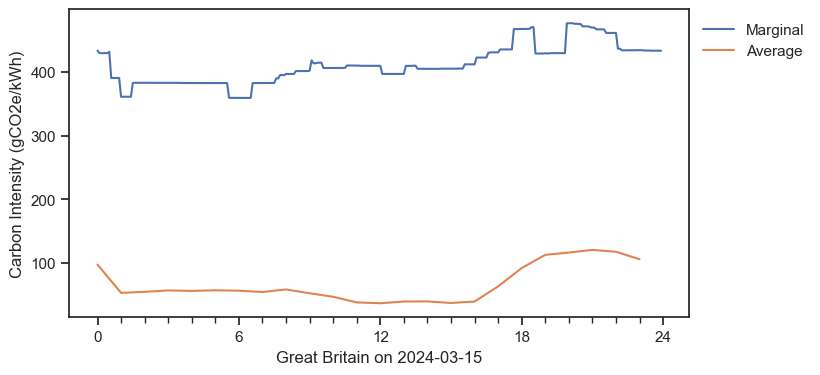

In [18]:
compare_region_signals_for_day(avg_gb_by_date, marg_gb_by_date, '2024-03-15', 'Great Britain', shift=gb_shift)

/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/2713598477.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 288), np.roll(marg_region_by_day.get_group(selected_day)['ci'], -(shift * 12)), label='Marginal')
/var/folders/qp/9y6xlfmn79v5gxb5p02g7vzc0000gn/T/ipykernel_99094/2713598477.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  plt.plot(range(0, 288, 12), np.roll(avg_region_by_day.get_group(selected_day)['ci'], -shift), label='Average')


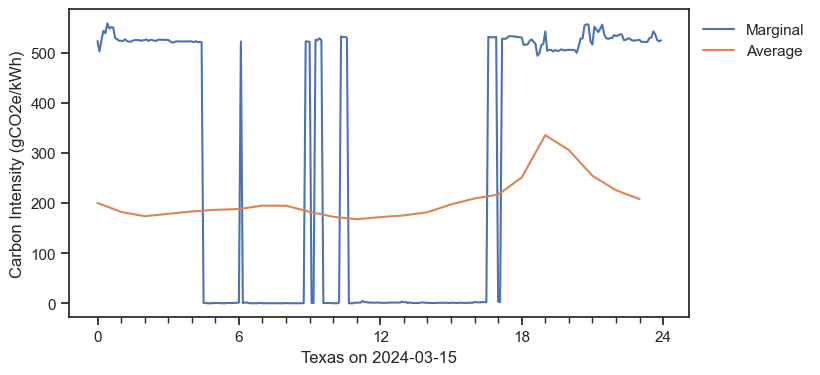

In [19]:
compare_region_signals_for_day(avg_tx_by_date, marg_tx_by_date, '2024-03-15', 'Texas', shift=tx_shift)

**Export CI Data for Shorter Intervals aligning with experiments**
- data is not shifted as it defaults to use UTC data, which is the same as the nextflow traces, which also use utc timestamps, so the data should align as expected

In [20]:
# Export Average CI Data 
def export_avg_carbon_intensity_data_for(df, prefix, start_month, start_day, end_day, year, end_month=None):
    monthly_data = df.groupby('month', as_index=False, sort=False)
    data = []

    if (end_month == None):
        month_data = monthly_data.get_group(start_month).groupby('day', as_index=False, sort=False)
        for day in range(start_day, end_day + 1):
            day_data = month_data.get_group(day).copy()
            #day_data['ci'] = np.roll(day_data['ci'], -shift)
            day_data = day_data.rename(columns={'hour': 'start', 'ci': 'actual'})
            data.append(day_data)
    else:
        for current_month in range(start_month, end_month + 1):
            month_data = monthly_data.get_group(current_month).groupby('day', as_index=False, sort=False)

            if current_month < end_month:
                final_day = len(month_data)

                for day in range(start_day, final_day + 1):
                    day_data = month_data.get_group(day).copy()
                    #day_data['ci'] = np.roll(day_data['ci'], -shift)
                    day_data = day_data.rename(columns={'hour': 'start', 'ci': 'actual'})
                    data.append(day_data)
            elif current_month == end_month:
                for day in range(1, end_day + 1):
                    day_data = month_data.get_group(day).copy()
                    #day_data['ci'] = np.roll(day_data['ci'], -shift)
                    day_data = day_data.rename(columns={'hour': 'start', 'ci': 'actual'})
                    data.append(day_data)

    if end_month == None:
        end_month = start_month

    out_data = pd.concat(data)
    out_data.to_csv(f'../data/intensity/out/{prefix}-{str(start_day).zfill(2)}{str(start_month).zfill(2)}{year}-{str(end_day).zfill(2)}{str(end_month).zfill(2)}{year}.csv', sep=',', index=False, encoding='utf-8', columns=['date', 'start', 'actual'])

In [21]:
# Workflows

# Export UK 31/08/24 - 30/09/24
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=8, start_day=31, end_day=30, year=2024, end_month=9)

# Export DE 09/05/24 - 01/08/24
export_avg_carbon_intensity_data_for(de, 'de', start_month=5, start_day=9, end_day=1, year=2024, end_month=8)

# Export DE 15/11/23 - 08/12/23
export_avg_carbon_intensity_data_for(de_2023, 'de', start_month=11, start_day=15, end_day=8, year=2023, end_month=12)

# Export DE 01/01/24 - 31/01/24
export_avg_carbon_intensity_data_for(de, 'de', start_month=1, start_day=1, end_day=31, year=2024, end_month=1)


In [22]:
# Export Marginal CI Data 
def export_marg_carbon_intensity_data_for(df, prefix, start_month, start_day, end_day, year, end_month=None):
    monthly_data = df.groupby('month', as_index=False, sort=False)
    data = []

    if (end_month == None):
        month_data = monthly_data.get_group(str(start_month).zfill(2)).groupby('day', as_index=False, sort=False)
        for day in range(start_day, end_day + 1):
            day_data = month_data.get_group(str(day).zfill(2)).copy()
            #day_data['ci'] = np.roll(day_data['ci'], -shift)
            day_data = day_data.rename(columns={'hour': 'start', 'ci': 'actual'})
            day_data['date'] = day_data['date']
            data.append(day_data)
    else:
        for current_month in range(start_month, end_month + 1):
            month_data = monthly_data.get_group(str(current_month).zfill(2)).groupby('day', as_index=False, sort=False)

            if current_month < end_month:
                final_day = len(month_data)

                for day in range(start_day, final_day + 1):
                    day_data = month_data.get_group(str(day).zfill(2)).copy()
                    #day_data['ci'] = np.roll(day_data['ci'], -shift)
                    day_data = day_data.rename(columns={'hour': 'start', 'ci': 'actual'})
                    day_data['date'] = day_data['date']
                    data.append(day_data)
            elif current_month == end_month:
                for day in range(1, end_day + 1):
                    day_data = month_data.get_group(str(day).zfill(2)).copy()
                    #day_data['ci'] = np.roll(day_data['ci'], -shift)
                    day_data = day_data.rename(columns={'hour': 'start', 'ci': 'actual'})
                    day_data['date'] = day_data['date']
                    data.append(day_data)

    if end_month == None:
        end_month = start_month

    out_data = pd.concat(data)
    out_data.to_csv(f'../data/intensity/out/{prefix}-{str(start_day).zfill(2)}{str(start_month).zfill(2)}{year}-{str(end_day).zfill(2)}{str(end_month).zfill(2)}{year}-marg.csv', sep=',', index=False, encoding='utf-8', columns=['date', 'start', 'actual'])

In [23]:
# Workflows

# Export UK 31/08/24 - 31/09/24
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=8, start_day=31, end_day=30, year=2024, end_month=9)

# Export DE 09/05/24 - 01/08/24
export_marg_carbon_intensity_data_for(marg_de, 'de', start_month=5, start_day=9, end_day=1, year=2024, end_month=8)

# Export DE 15/11/23 - 08/12/23
export_marg_carbon_intensity_data_for(marg_de_2023, 'de', start_month=11, start_day=15, end_day=8, year=2023, end_month=12)

# Export DE 01/01/24 - 31/01/24
export_marg_carbon_intensity_data_for(marg_de, 'de', start_month=1, start_day=1, end_day=31, year=2024, end_month=1)

In [24]:
# Export CI Data (Average CI) -- GB
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=1, start_day=8, end_day=13, year=2024, end_month=1)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=2, start_day=12, end_day=17, year=2024, end_month=2)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=3, start_day=11, end_day=16, year=2024, end_month=3)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=4, start_day=8, end_day=13, year=2024, end_month=4)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=5, start_day=13, end_day=18, year=2024, end_month=5)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=6, start_day=10, end_day=15, year=2024, end_month=6)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=7, start_day=8, end_day=13, year=2024, end_month=7)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=8, start_day=12, end_day=17, year=2024, end_month=8)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=9, start_day=9, end_day=14, year=2024, end_month=9)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=10, start_day=14, end_day=19, year=2024, end_month=10)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=11, start_day=11, end_day=16, year=2024, end_month=11)
export_avg_carbon_intensity_data_for(gb, 'gb', start_month=12, start_day=9, end_day=14, year=2024, end_month=12)

# Export CI Data (Marginal CI) -- GB 
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=1, start_day=8, end_day=13, year=2024, end_month=1)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=2, start_day=12, end_day=17, year=2024, end_month=2)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=3, start_day=11, end_day=16, year=2024, end_month=3)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=4, start_day=8, end_day=13, year=2024, end_month=4)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=5, start_day=13, end_day=18, year=2024, end_month=5)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=6, start_day=10, end_day=15, year=2024, end_month=6)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=7, start_day=8, end_day=13, year=2024, end_month=7)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=8, start_day=12, end_day=17, year=2024, end_month=8)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=9, start_day=9, end_day=14, year=2024, end_month=9)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=10, start_day=14, end_day=19, year=2024, end_month=10)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=11, start_day=11, end_day=16, year=2024, end_month=11)
export_marg_carbon_intensity_data_for(marg_gb, 'gb', start_month=12, start_day=9, end_day=14, year=2024, end_month=12)


# Filenames
gb-08012024-13012024  
gb-12022024-17022024  
gb-11032024-16032024  
gb-08042024-13042024  
gb-13052024-18052024  
gb-10062024-15062024  
gb-08072024-13072024  
gb-12082024-17082024  
gb-09092024-14092024  
gb-14102024-19102024  
gb-11112024-16112024  
gb-09122024-14122024  